In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

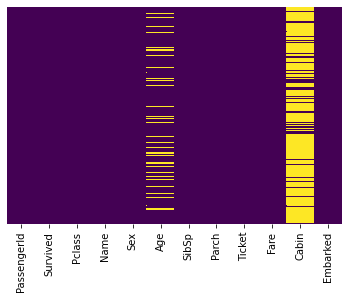

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

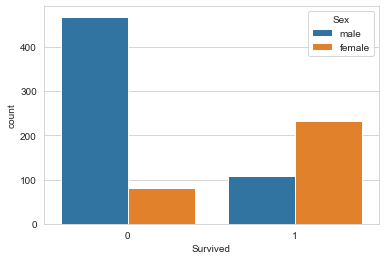

In [14]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

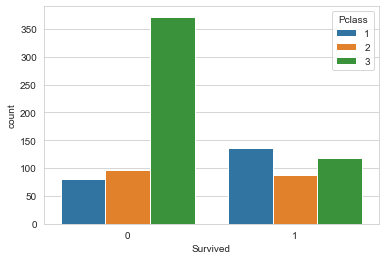

In [15]:
sns.countplot(x='Survived',data=train,hue='Pclass')

<AxesSubplot:xlabel='Age'>

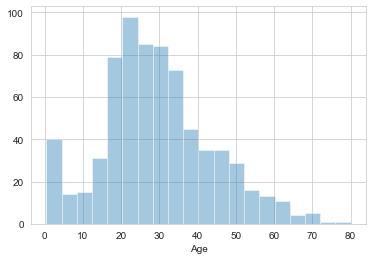

In [21]:
sns.distplot(train['Age'].dropna(),kde=False)

<AxesSubplot:ylabel='Frequency'>

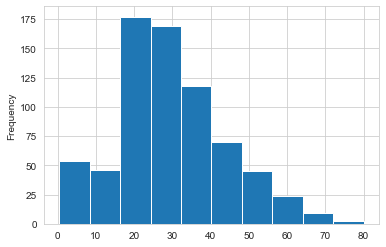

In [22]:
train['Age'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

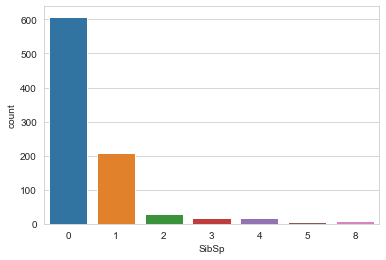

In [23]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

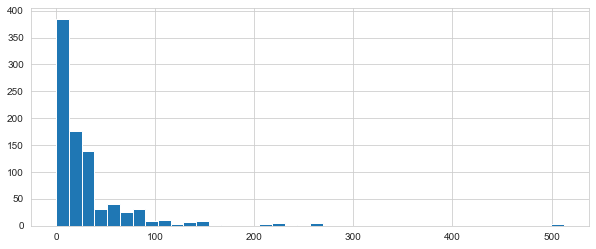

In [26]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [27]:
import cufflinks as cf
cf.go_offline()

In [28]:
train['Fare'].iplot(kind='hist')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

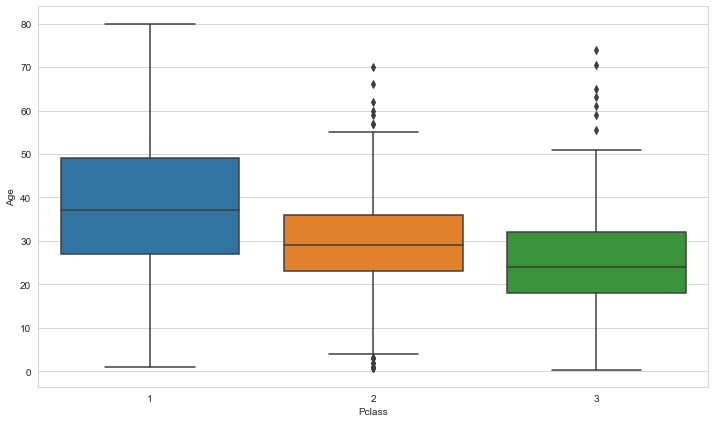

In [30]:
#Cleaning data 
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) 

<AxesSubplot:>

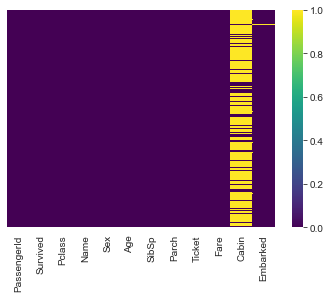

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [36]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

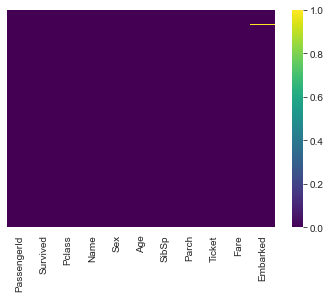

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')


In [39]:
train.dropna(inplace=True)

<AxesSubplot:>

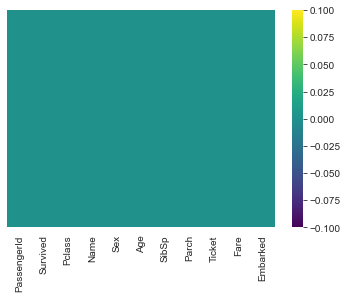

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')


In [48]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [49]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [50]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [51]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [54]:
train = pd.concat([train,sex,embark],axis=1)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [57]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [65]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 101)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log_model = LogisticRegression()

In [71]:
log_model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [73]:
predictions = log_model.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)